In [1]:
import numpy as np
import pandas as pd

def metric(d0, d1, w):
    return d0**(1+w)*d1**(2-w)

# Set data
do = 0.3
dh = 0.2
w = 0.5

all_w = np.arange(0.0, 1.0, 0.1)
all_do = np.arange(0.0, 1.0, 0.2)
all_dh = np.arange(0.0, 0.5, 0.1)

m =  metric(do,  dh, all_w)

In [2]:
for dh in all_dh:
# pd.Series(data=metric(do, all_dh, w), index=all_dh).plot(x="d_h", y="d")
    pd.Series(data=metric(all_do, dh, w), index=all_do, name="dh={:1.2f} w={:1.2f}".format(dh, w)).plot(legend=True)

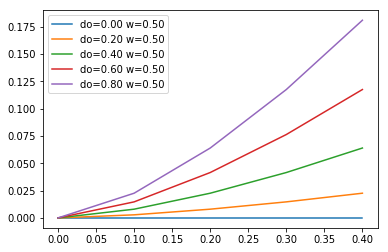

In [3]:
for do in all_do:
    pd.Series(data=metric(do, all_dh, w), index=all_dh, name="do={:1.2f} w={:1.2f}".format(do, w)).plot(legend=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

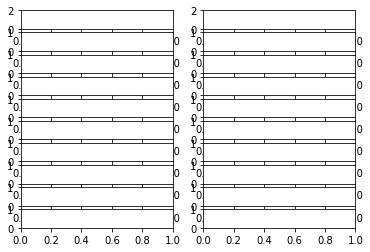

In [6]:
import matplotlib
matplotlib.use('TKAgg')
from pylab import *
import matplotlib.pyplot as plt
import tikzplotlib as mpl2tkz

def metric(d0, d1, w):
    return d0**(1+w)+d1**(2-w)

fig, axes = plt.subplots(nrows=len(all_w), ncols=2)
for iw in range(0, len(all_w)):
    axes[iw, 0].set_ylim([0,2])
    axes[iw, 1].set_ylim([0, 2])
    for dh in all_dh:
        pd.Series(data=metric(all_do, dh, all_w[iw]), index=all_do, name="dh={:1.2f} w={:1.2f}".format(dh, w)).plot(ax=axes[iw, 0])
    for do in all_do:
        pd.Series(data=metric(do, all_dh, all_w[iw]), index=all_dh, name="do={:1.2f} w={:1.2f}".format(do, w)).plot(ax=axes[iw, 1])

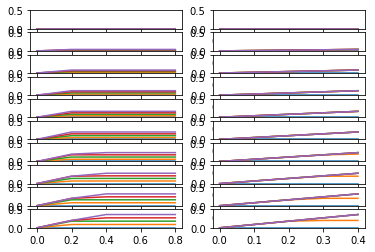

In [12]:
def metric(d0, d1, w):
    return min(d0, d1*w)


fig, axes = plt.subplots(nrows=len(all_w), ncols=2)
for iw in range(0, len(all_w)):
    axes[iw, 0].set_ylim([0,0.5])
    for dh in all_dh:
        series = []
        for do in all_do:
            series.append(metric(do, dh, all_w[iw]))
        pd.Series(data=series, index=all_do, name="dh={:1.2f} w={:1.2f}".format(dh, w)).plot(ax=axes[iw, 0])

for iw in range(0, len(all_w)):
    axes[iw, 1].set_ylim([0,0.5])
    for do in all_do:
        series = []
        for dh in all_dh:
            series.append(metric(do, dh, all_w[iw]))
        pd.Series(data=series, index=all_dh, name="do={:1.2f} w={:1.2f}".format(do, w)).plot(ax=axes[iw, 1])